In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pandas as pd
import numpy as np


In [17]:
if not os.path.exists("../data/winequality-red.csv"):
    !wget "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
    !unzip "wine+quality.zip"


In [18]:
df = pd.read_csv("../data/winequality-red.csv", delimiter=";")

In [19]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [23]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


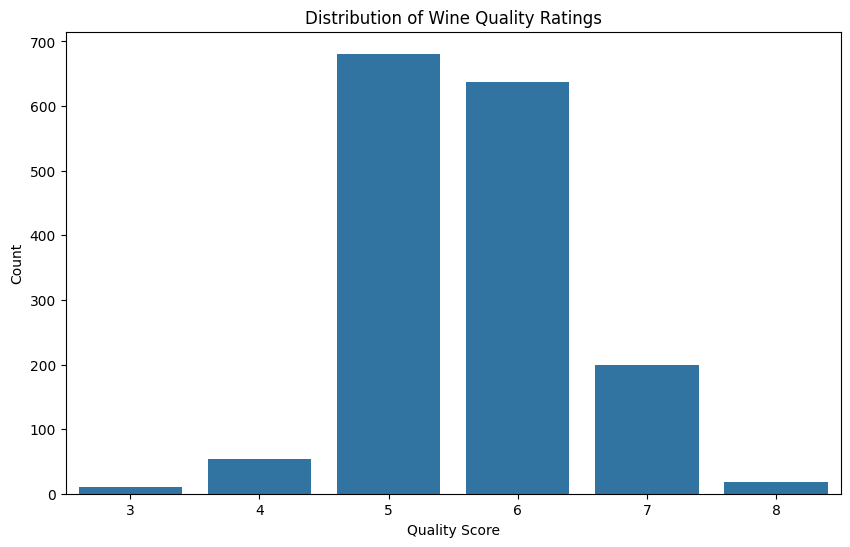

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

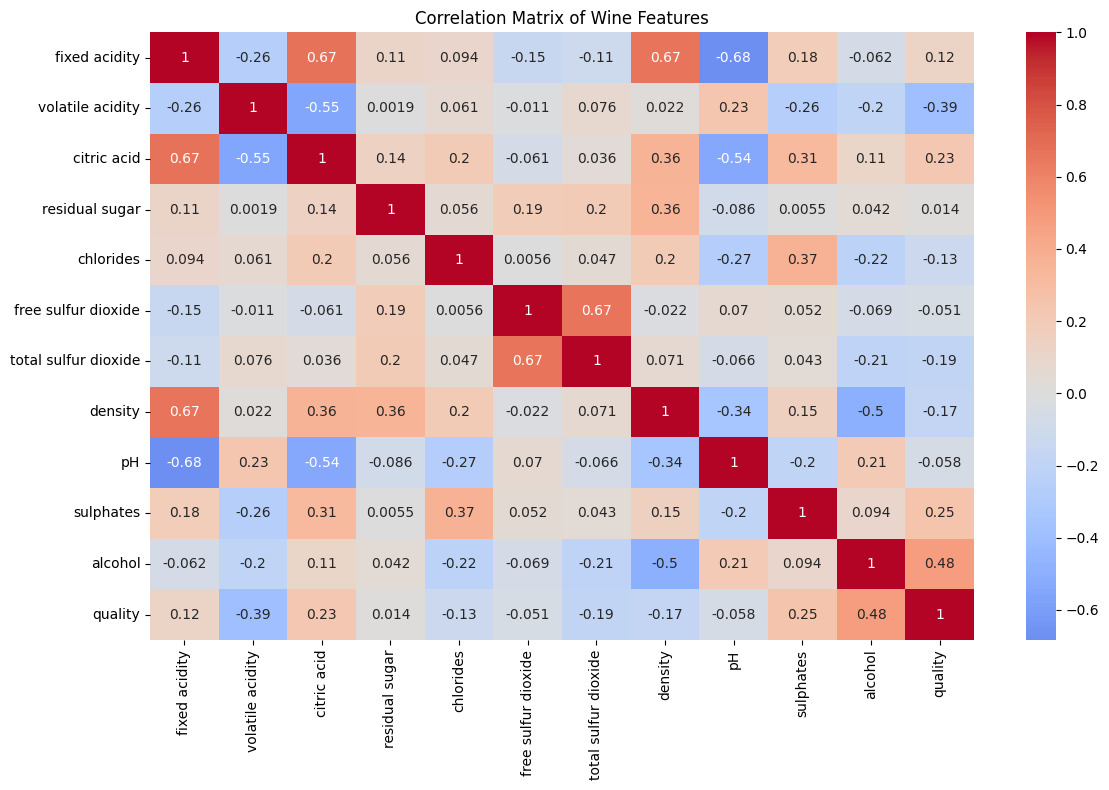

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

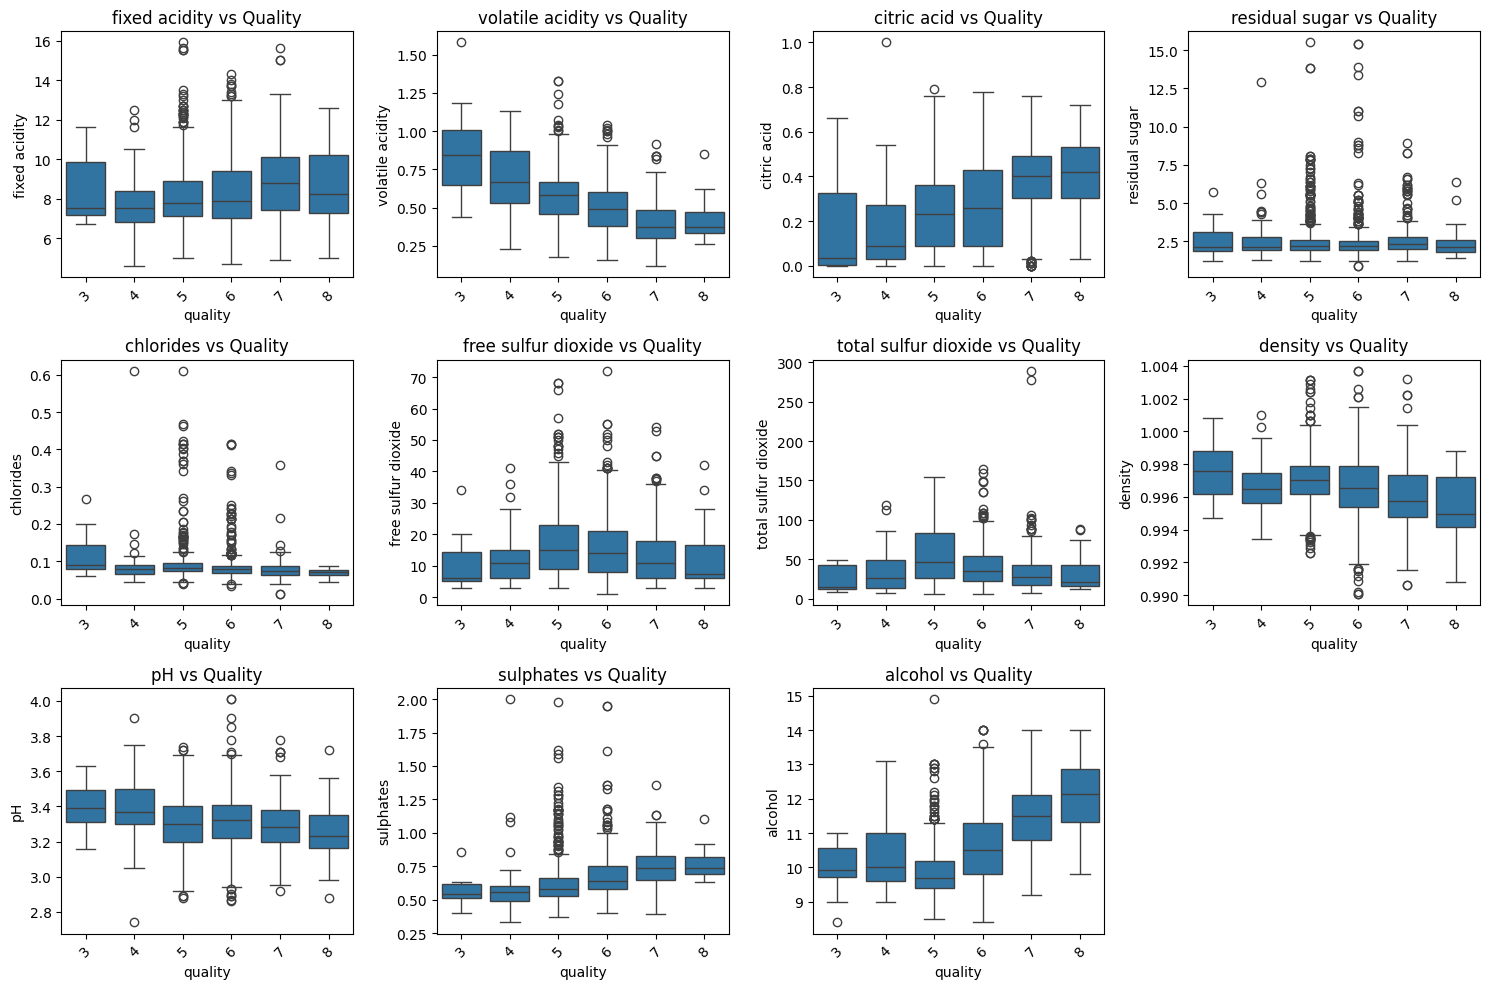

In [26]:
features = df.columns.drop('quality')
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='quality', y=feature)
    plt.title(f'{feature} vs Quality')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

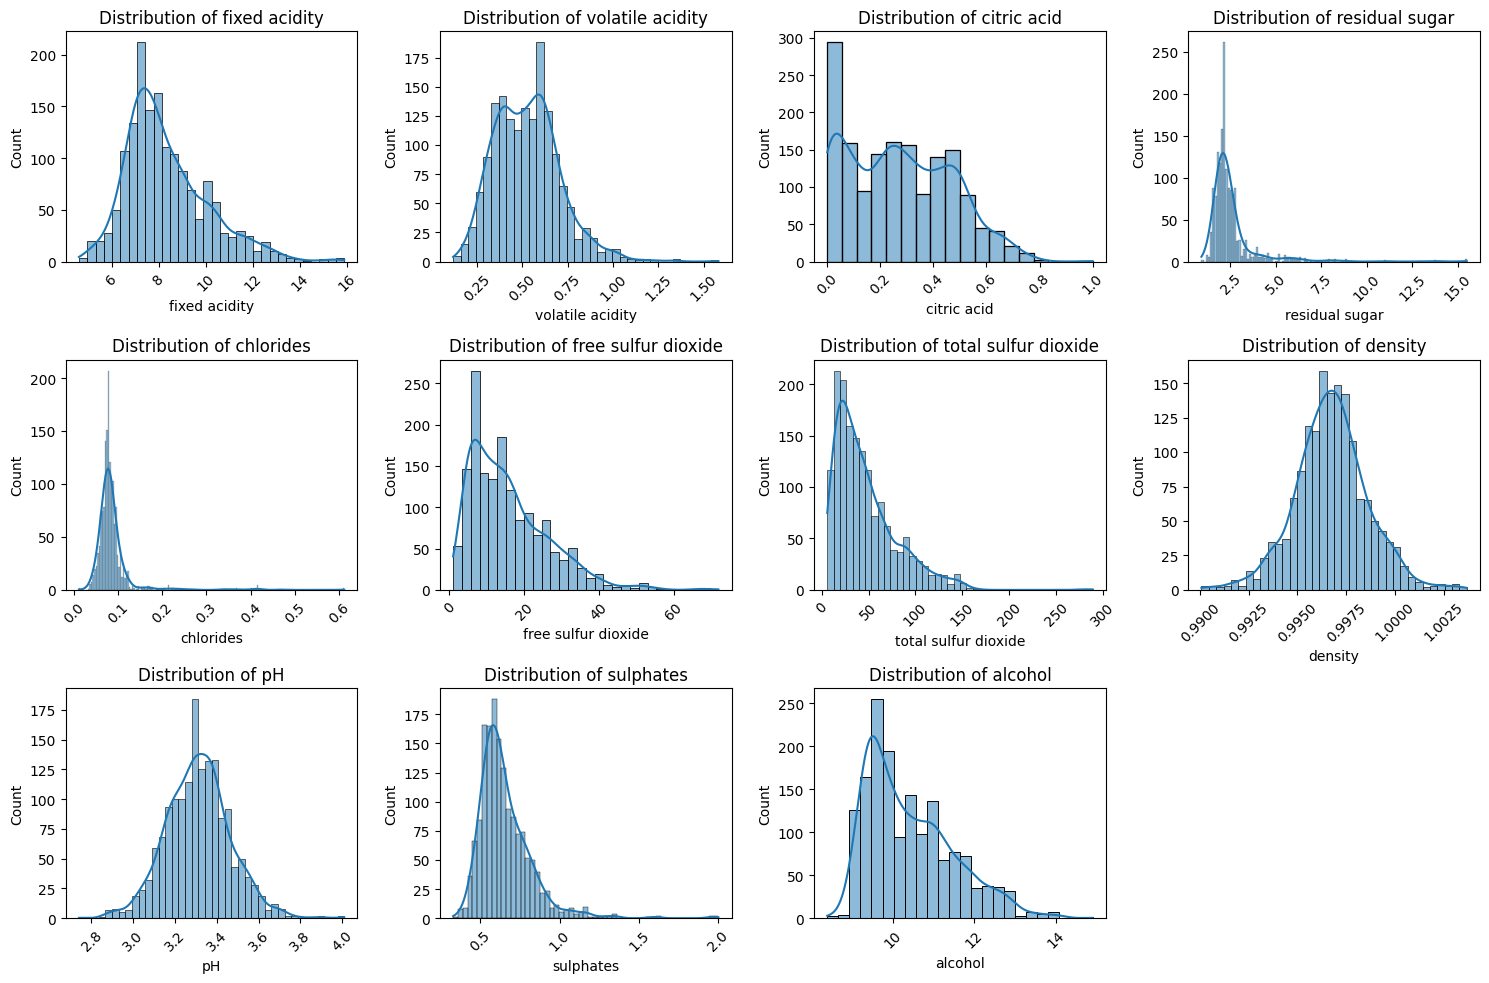

In [27]:
# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print("\nTop 3 features most correlated with quality:")
print(correlations[1:4])


Top 3 features most correlated with quality:
alcohol        0.476166
sulphates      0.251397
citric acid    0.226373
Name: quality, dtype: float64


Evaluating Linear Regression...


Mean CV RMSE: 0.6621 (+/- 0.0418)
Evaluating Random Forest...
Mean CV RMSE: 0.6087 (+/- 0.0430)
Best Params for Random Forest: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30}
Evaluating XGBoost...
Mean CV RMSE: 0.6333 (+/- 0.0444)
Best Params for XGBoost: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.1}

Best Model: Random Forest

Test Set Performance:
RMSE: 0.5531
MAE: 0.4251
R² Score: 0.5319


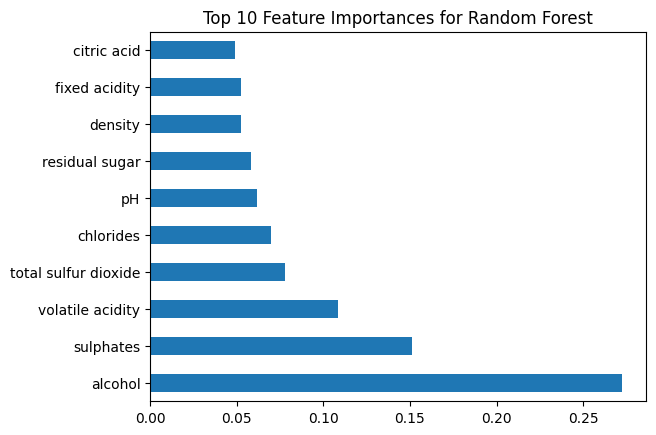

In [29]:
# Split features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split into train and test sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and pipelines
pipelines = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('model', xgb.XGBRegressor(random_state=42, eval_metric='rmse'))
    ])
}

# Hyperparameter grids
param_grids = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__subsample': [0.8, 0.9, 1.0]
    },
    # Add grids for other models if necessary
}

# Evaluate and tune models
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Evaluating {name}...")
    # Cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    print(f"Mean CV RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    
    # Hyperparameter tuning if grid is defined
    param_grid = param_grids.get(name)
    if param_grid:
        grid_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grid,
            n_iter=20,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            random_state=42
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Params for {name}: {grid_search.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

# Select the best model based on CV score
best_model_name = min(best_models, key=lambda name: np.mean(np.sqrt(-cross_val_score(
    best_models[name], X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))))
final_model = best_models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Evaluate the best model on the test set
test_predictions = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R² Score: {test_r2:.4f}")

# Plot feature importances if the model supports it
if hasattr(final_model.named_steps['model'], 'feature_importances_'):
    importances = final_model.named_steps['model'].feature_importances_
    features = X_train.columns
    feat_importances = pd.Series(importances, index=features)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title(f'Top 10 Feature Importances for {best_model_name}')
    plt.show()

In [30]:
# Save the best model
import joblib
model_file = '../models/wine_quality_model.joblib'
os.makedirs('../models', exist_ok=True)
joblib.dump(final_model, model_file)


['../models/wine_quality_model.joblib']